In [1]:
from alex_extractor import build_alexnet_design_matrices_with_dataloader

from plotter import plot_comparison, plot_comparison_multi

import pandas as pd
import os

# Passing the stimuli to AlexNet and extracting activations

The idea is to use a pretrained model (AlexNet) to extract features from the stimuli images, and then use these features to predict neural responses. 

Using the formalism discussed in the [neural_to_neural.ipynb](neural_to_neural.ipynb) notebook, we can think of the model as a "source" and the neural data as a "target". We will compute the similarity between the model's representation and the neural representation using the same metrics as before (RSA, CKA, PLS).

Here the design matrices of the AlexNet representation do not have trials, to the splits (required for the reliability computation in the corrected similarity version) are performed only on the neural data.

# Per-checkpoint Analysis

In [ ]:
# config
IMAGE_FOLDER = "../Preproc2/images/"
NUM_WORKERS = 15
INDEX_CSV_PATH = '../Preproc2/data/combined_index.csv'
METRIC_NAME = 'PLS'
N_BOOT = 1
N_SPLIT = 1
N_COMPONENTS = 1000

# folders
dir_supervised_no_diet = "checkpoints/supervised_no-diet/20250915_023037_sgd"
dir_supervised_diet = "checkpoints/supervised_diet/20250915_045059_sgd"
dir_self_supervised_no_diet = "checkpoints/self-supervised_no-diet/20250922_144504_warmup+dynamic"
dir_self_supervised_diet = "checkpoints/self-supervised_diet/20250929_010742_warmup+dynamic"

# dict to save best ckpt info
best_ckpts = {
    "Random": "random",
    "Inet": "imagenet",
}

# load index
index_df = pd.read_csv('../Preproc2/data/combined_index.csv')

#### Supervised No-Diet

In [ ]:
from plotter import analyze_checkpoints

snd_all_scores, snd_median_scores, snd_best_info = analyze_checkpoints(
    checkpoint_dir=dir_supervised_no_diet,
    image_folder="../Preproc2/images",
    index_csv_path="../Preproc2/data/combined_index.csv",
    metric=METRIC_NAME,
    chunk_size=40000,
    batch_size=16,
    num_workers=15,
    device="cuda",
    save=False,
    n_boot=N_BOOT,
    n_splits=N_SPLIT,
    n_components=N_COMPONENTS,
)
print(snd_best_info)
best_ckpts['supervised_no_diet'] = os.path.join(dir_supervised_no_diet, snd_best_info['checkpoint_name'])

Checkpoints:   0%|          | 0/10 [00:00<?, ?ckpt/s]/home/spina/Desktop/units/DL/project/mice-representation/representation/neural_maps.py:284: RuntimeWarning: Mean of empty slice
  per_unit = np.nanmean(per_split, axis=0)  # (q,)
/home/spina/Desktop/units/DL/project/mice-representation/representation/neural_maps.py:284: RuntimeWarning: Mean of empty slice
  per_unit = np.nanmean(per_split, axis=0)  # (q,)
/home/spina/Desktop/units/DL/project/mice-representation/representation/neural_maps.py:284: RuntimeWarning: Mean of empty slice
  per_unit = np.nanmean(per_split, axis=0)  # (q,)
/home/spina/Desktop/units/DL/project/mice-representation/representation/neural_maps.py:284: RuntimeWarning: Mean of empty slice
  per_unit = np.nanmean(per_split, axis=0)  # (q,)
/home/spina/Desktop/units/DL/project/mice-representation/representation/neural_maps.py:284: RuntimeWarning: Mean of empty slice
  per_unit = np.nanmean(per_split, axis=0)  # (q,)
/home/spina/Desktop/units/DL/project/mice-representa

{'checkpoint_name': 'checkpoint_epoch_10.pth', 'epoch': 10, 'overall_score': 0.324966364538038, 'checkpoint_path': '/home/spina/Desktop/units/DL/project/mice-representation/checkpoints/supervised_no-diet/20250915_023037_sgd/checkpoint_epoch_10.pth'}


<Figure size 1500x1000 with 0 Axes>

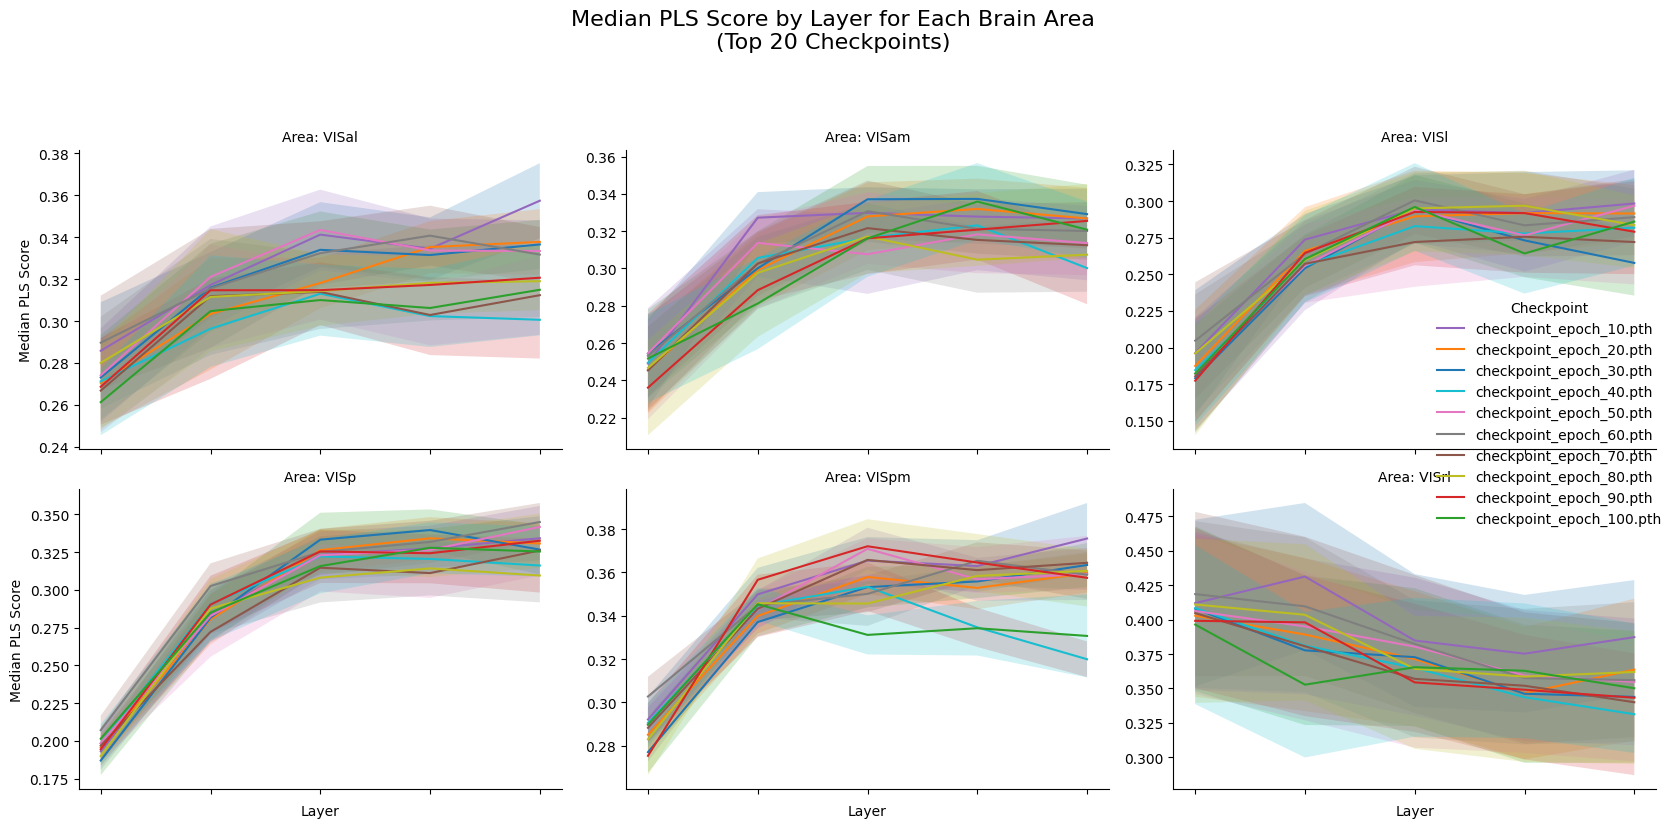

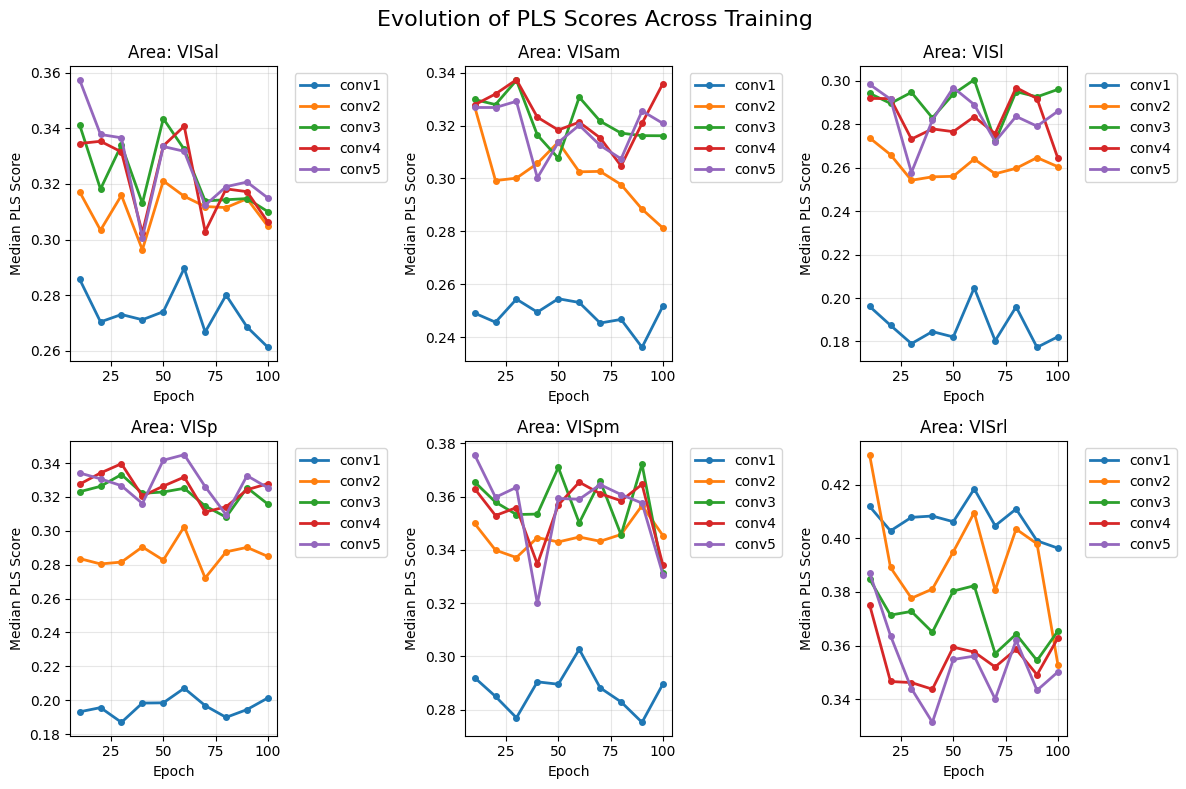

In [4]:
from plotter import plot_checkpoint_comparison, plot_checkpoint_evolution
plot_checkpoint_comparison(snd_median_scores, metric_name=METRIC_NAME)
plot_checkpoint_evolution(snd_median_scores, metric_name=METRIC_NAME)

#### Supervised Diet

In [ ]:
from plotter import analyze_checkpoints

sd_all_scores, sd_median_scores, sd_best_info = analyze_checkpoints(
    checkpoint_dir=dir_supervised_diet,
    image_folder="../Preproc2/images",
    index_csv_path="../Preproc2/data/combined_index.csv",
    metric=METRIC_NAME,
    batch_size=16,
    num_workers=15,
    device="cuda",
    save=False,
    n_boot=N_BOOT,
    n_splits=N_SPLIT,
)
print(sd_best_info)
best_ckpts['supervised_diet'] = os.path.join(dir_supervised_diet, sd_best_info['checkpoint_name'])

Checkpoints:   0%|          | 0/9 [00:00<?, ?ckpt/s]/home/spina/Desktop/units/DL/project/mice-representation/representation/neural_maps.py:284: RuntimeWarning: Mean of empty slice
  per_unit = np.nanmean(per_split, axis=0)  # (q,)
/home/spina/Desktop/units/DL/project/mice-representation/representation/neural_maps.py:284: RuntimeWarning: Mean of empty slice
  per_unit = np.nanmean(per_split, axis=0)  # (q,)
/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/home/spina/Desktop/units/DL/project/mice-representation/representation/neural_maps.py:284: RuntimeWarning: Mean of empty slice
  per_unit = np.nanmean(per_split, axis=0)  # (q,)
/home/spina/Desktop/units/DL/project/mice-representation/representation/neural_maps.py:284: RuntimeWarning: Mean of empty slice
  per_uni

In [ ]:
from plotter import plot_checkpoint_comparison, plot_checkpoint_evolution
plot_checkpoint_comparison(sd_median_scores, metric_name=METRIC_NAME)
plot_checkpoint_evolution(sd_median_scores, metric_name=METRIC_NAME)

#### Self-Supervised No-Diet

In [ ]:
from plotter import analyze_checkpoints

ssnd_all_scores, ssnd_median_scores, ssnd_best_info = analyze_checkpoints(
    checkpoint_dir=dir_self_supervised_no_diet,
    image_folder="../Preproc2/images",
    index_csv_path="../Preproc2/data/combined_index.csv",
    metric=METRIC_NAME,
    batch_size=16,
    num_workers=15,
    device="cuda",
    save=False,
    n_boot=N_BOOT,
    n_splits=N_SPLIT,
)
print(ssnd_best_info)
best_ckpts['self_supervised_no_diet'] = os.path.join(dir_self_supervised_no_diet, ssnd_best_info['checkpoint_name'])

In [ ]:
from plotter import plot_checkpoint_comparison, plot_checkpoint_evolution
plot_checkpoint_comparison(ssnd_median_scores, metric_name=METRIC_NAME)
plot_checkpoint_evolution(ssnd_median_scores, metric_name=METRIC_NAME)

#### Self-Supervised Diet

In [ ]:
from plotter import analyze_checkpoints

ssd_all_scores, ssd_median_scores, ssd_best_info = analyze_checkpoints(
    checkpoint_dir=dir_self_supervised_diet,
    image_folder="../Preproc2/images",
    index_csv_path="../Preproc2/data/combined_index.csv",
    metric=METRIC_NAME,
    batch_size=16,
    num_workers=15,
    device="cuda",
    save=False,
    n_boot=N_BOOT,
    n_splits=N_SPLIT,
)
print(ssd_best_info)
best_ckpts['self_supervised_diet'] = os.path.join(dir_self_supervised_diet, ssd_best_info['checkpoint_name'])

In [ ]:
from plotter import plot_checkpoint_comparison, plot_checkpoint_evolution
plot_checkpoint_comparison(ssd_median_scores, metric_name=METRIC_NAME)
plot_checkpoint_evolution(ssd_median_scores, metric_name=METRIC_NAME)

---

#### Best Checkpoint Per-Model Evaluation

In [ ]:
models = {}

for model in best_ckpts.keys():
    models[model] = build_alexnet_design_matrices_with_dataloader(
        folder=IMAGE_FOLDER,
        batch_size=16,
        shuffle=False,
        num_workers=NUM_WORKERS,
        weights=best_ckpts[model],
        device="cuda",
        amp=False,
        layers_keep=["conv1", "conv2", "conv3", "conv4", "conv5"],
        save_dir=False,
        return_in_memory=True
    )

In [ ]:
from mapping import compute_area_scores

layer_scores_models_cka = {}
for model in models.keys():
    _, layer_scores_models_cka[model] = compute_area_scores(
        index_model=models[model],
        index_df=index_df,
        sim_metric=METRIC_NAME,
        n_boot=5,
        n_splits=5,
    )

In [ ]:
from plotter import plot_comparison_multi

plot_comparison_multi(list(layer_scores_models_cka.values()), names=list(layer_scores_models_cka.keys()))